# Introduction

This notebook aims to analyze insurance data, communicate usefuls insights derived from the analysis to policy makers, generate a predictive model and accurately predict insurance charges given the modelled features.  
The dataset can be obtained from the [kaggle_link](https://www.kaggle.com/mirichoi0218/insurance).  The Data has the following column descriptions
- `age`: age of primary beneficiary
- `sex`: insurance contractor gender, female, male
- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- `children`: Number of children covered by health insurance / Number of dependents
- `smoker`: Smoking
- `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- `charges`: Individual medical costs billed by health insurance

### EDA 

First off we begin with performing some exploratory data analysis and visualization, after which we'll answer some questions which will help us derive some intuition about the dataset.   
Specifically, we'll answer the following questions:  
1. Does insurance charge differ across gender?
2. Do smokers incur more insurance charges than non-smokers?
3. Do people with more children incur higher insurance charges?
4. what region has the highest and least insurance charge?
5. Do older people incur more insurance charges than younger adults?

Let's get started!

In [1]:
#import required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
insurance = pd.read_csv('./Dataset/insurance.csv')

In [3]:
# inspect the dataset
print(insurance.shape)
insurance.head()


(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The above output shows that there are 1,338 individual respondents in the dataset

In [4]:
# show descriptives of the dataset
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


The above output shows the descriptive statistics for all columns in the dataset.  
The mean age is of individuals is 39, the maximum age is 64, while the minimum is 18.  
Males have a greater representation (676) in the dataset than females.  
Majority of the respondents are non-smokers (1064).  
Southeast region has the most respondents in the dataset (364).

In [5]:
# show column details
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The above output shows that there are no null values in the dataset columns.  
The output also shows that the data types for the columns are 2 float colums, 2 integer columns and 3 string clomns

  # Visual EDA

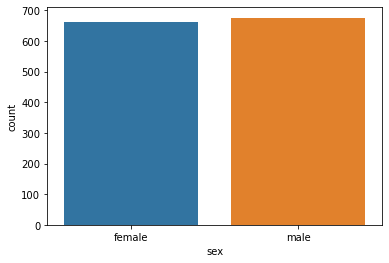

In [6]:
# visualize the sex distribution
sns.countplot(data=insurance, x= 'sex')

# show the plot
plt.show()

The above chart shows that there are slightly more males than females in the dataset.

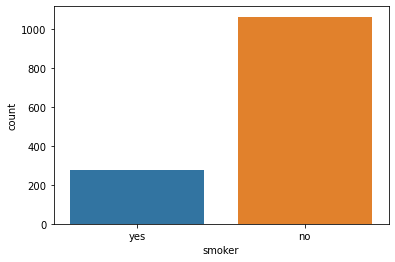

In [7]:
# visualize smokers distribution
sns.countplot(data = insurance, x = 'smoker')

# show the plot
plt.show()

The above chart shows that there are more non smokers in the dataset than there are smokers.

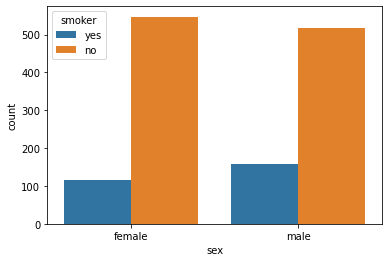

In [8]:
# show the  of charges for each sex
sns.countplot(data = insurance, x='sex', hue='smoker')

# show the plot
plt.show()

The above plot shows amongst the smokers, that there are more male smokers than females smokers. 

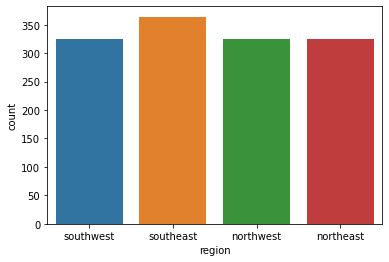

In [9]:
# show the distribution of respondents region
sns.countplot(data=insurance , x = 'region')
plt.show()

The above plot shows that majority of the respondents are from the southeast region, while the other regions have an almost equal representation of respondents.

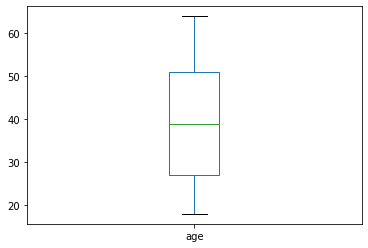

In [10]:
# show the distribution respondents age
insurance.boxplot(column='age', grid=False)

# show the plot
plt.show()

The above chart shows that 25% of respondents are below 25 years, 50% are below 40 years and 75% are below 52 years.

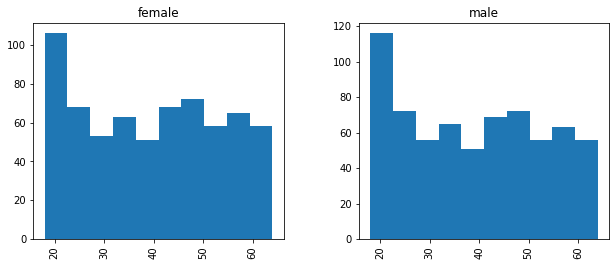

In [11]:
# show the distribution of ages of respondents
insurance.hist(column='age', grid=False, by= 'sex', figsize= (10, 4))

# show the plot
plt.show()

The above histogram plots show age is right skewed for both sexes that majority of the respondents are above 30 years old for both genders.

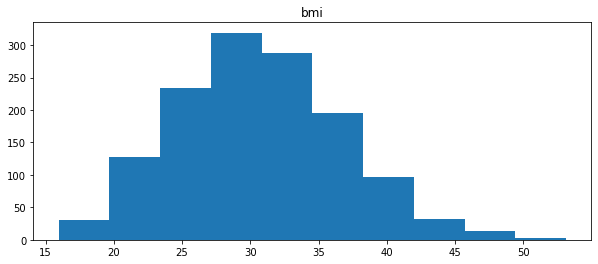

In [12]:
# show the distribution of BMI
insurance.hist(column='bmi', grid=False, figsize= (10, 4))

# show the plot
plt.show()

The BMI of respondents is slightly skewed to the right, indicating that most respondents have BMI greater than 30

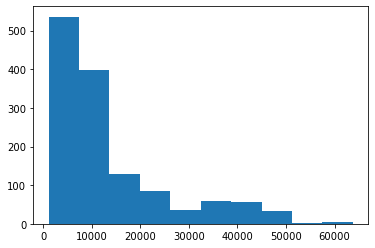

In [13]:
# plot the distribution of insurance charges
plt.hist(insurance['charges'])

# show the plot
plt.show()

The above plot shows that the charges for insurance is right skewed. This invariably means that majority of the respondents are charged greater than mean insurance charge (13270.422265)

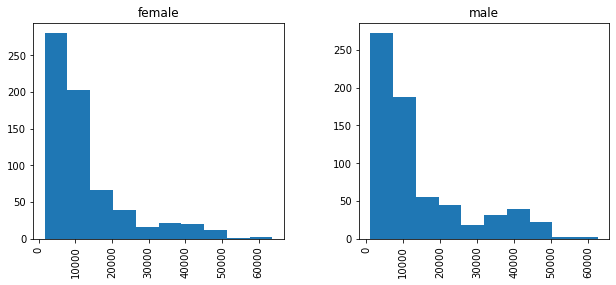

In [14]:
# plot the distribution of charges between gender 
insurance.hist(column='charges', by='sex', grid=False, figsize=(10, 4))

# show the plot
plt.show()

The above plot shows that the charges for insurance is right skewed for both sexes. This implies that majority of both male and female respondents are charged greater than mean insurance charge (13270.422265)


### Does insurance charge differ across gender?

In [15]:
# get a dataframe for just males
male_insurance = insurance[insurance['sex'] == 'male']

# get a dataframe of just females
female_insurance = insurance[insurance['sex'] == 'female']

# get the descriptives for just males
print('Males Insurance charge Stats'.upper(), '\n',male_insurance['charges'].describe(), '\n')
print('Females Insurance charge Stats'.upper(), '\n', female_insurance['charges'].describe())

MALES INSURANCE CHARGE STATS 
 count      676.000000
mean     13956.751178
std      12971.025915
min       1121.873900
25%       4619.134000
50%       9369.615750
75%      18989.590250
max      62592.873090
Name: charges, dtype: float64 

FEMALES INSURANCE CHARGE STATS 
 count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges, dtype: float64


The above output shows the descrptive analysis of insurance charges for males and females respectively.  
On the average, we can see that males (13956.75) incur higher isurance charges than females (12,569.70), though the difference in charges is not too large. Looking at the counts for males (676) and females (662), we see that there are 14 more males than females, with this observation, it is expected that the mean charges for males be lower than that of females, but since that is not the case, we conclude that this difference in means is as a result of a bias in insurance charges, favouring females more than males.




### Do smokers incur more insurance charges than non-smokers?

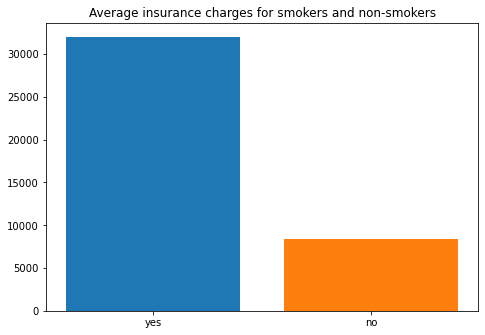

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# get the dataframe and mean charges for smokers
smoker = insurance[insurance['smoker'] == 'yes']
mean_smoker = smoker['charges'].mean()

# get the dataframe and mean charges for non-smokers
non_smoker = insurance[insurance['smoker'] == 'no']
mean_non_smoker = non_smoker['charges'].mean()

# plot the bar charts
ax.bar(smoker['smoker'], mean_smoker)
ax.bar(non_smoker['smoker'], mean_non_smoker)
plt.title('Average insurance charges for smokers and non-smokers')

# show the plot
plt.show()

The above chart depicts that, on the average, smokers incur higher insurance charges than non, smokers. Let's see th counts of both smokers and non-smokers in order to get a better intuition.


In [17]:
# show the number of smokers and non-smokers
print(f'number of smokers is: {smoker.shape[0]}')
print(f'The number of non-smokers is: {non_smoker.shape[0]}', '\n')

# mean difference between smokers and non-smokers
print(f' The mean for smokers is {mean_smoker}', '\n', f'while the mean for non-smokers is: {mean_non_smoker}' '\n',
      f'The mean difference is {mean_smoker - mean_non_smoker}')

number of smokers is: 274
The number of non-smokers is: 1064 

 The mean for smokers is 32050.23183153285 
 while the mean for non-smokers is: 8434.268297856199
 The mean difference is 23615.96353367665


The number of non-smokers is 4 times the number of smokers, this could be the reason for its lower mean insurance charge, since the division is done across multiple values. But the mean difference shows that the average charge for smokers is about 5 times the charge for non-smokers.

Thus, we conclude that insurance charges differs according to individuals smoking habits, people who have smoking habits pay heavier insurance charges than those who don't. 

# Do people with more children incur higher insurance charges?



In [18]:
# lets see the descriptives for the children column
print(insurance['children'].describe())

# show the children counts
insurance['children'].value_counts()


count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

The above output shows us that majority of the individuals in the dataset had no children at all, while the maximum number of chidren for a single respondent is 5.

Next we'll see the average insurance charges for individuals with the different number of children.


               charges
children              
0         12365.975602
1         12731.171832
2         15073.563734
3         15355.318367
4         13850.656311
5          8786.035247


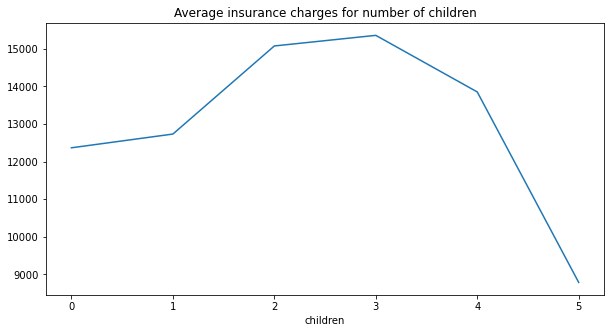

In [19]:
# get a pivot table of the average charges for the different number of children
pv_children = insurance.pivot_table(values = 'charges', index = 'children', aggfunc= np.mean)

# plot a line chart of the pivot table
pv_children.plot(title= 'Average insurance charges for number of children',
                 legend= None,
                 figsize= (10, 5))

# show the pivot table
print(pv_children)

# show the pivot line plot
plt.show()

The above line chart shows the trend of insurance charges with the number of children. From the chart we can observe that those with 3 children incured the highest charges while those with 5 children incured the lowest charges.  
Those without kids incured greater charges than those with 5 kids.

Although it is expected that insurance charges be greater for those with more children than those with fewer children, an observation of the above line chart shows that the charges increases steadily for those with 0-3 kids where it got to its peak and declined significantly for those with 5 kids. The reason for this sharp decline could be attributed to the very few number of individuals in the dataset with 5 children (18).

Thus we conclude that number of children affects insurance charges as individuals with more children incur more charges than individuals with fewer children.

# what region has the highest and least insurance charge?

In [20]:
# show the region counts
insurance['region'].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

The above output shows that there are four regions in the dataset with most of the individuals coming from the southeast region.

Let's see the minimum and maximum charges for each region

The above output shows that the southeast region has both the maximum and minimum

In [21]:
# get the region with the highest insurance charge
print('region with highest insurance charge is:'.upper(), '\n', insurance[insurance['charges'] == insurance['charges'].max()]['region'], '\n')

# get the region with the least insurance charge
print('region with the least insurance charge is:'.upper(), '\n', insurance[insurance['charges'] == insurance['charges'].min()]['region'])

REGION WITH HIGHEST INSURANCE CHARGE IS: 
 543    southeast
Name: region, dtype: object 

REGION WITH THE LEAST INSURANCE CHARGE IS: 
 940    southeast
Name: region, dtype: object


Southeast region has both the highest and least insurance charges.

 Let's plot the average charges for each region.

                charges
region                 
northeast  13406.384516
northwest  12417.575374
southeast  14735.411438
southwest  12346.937377


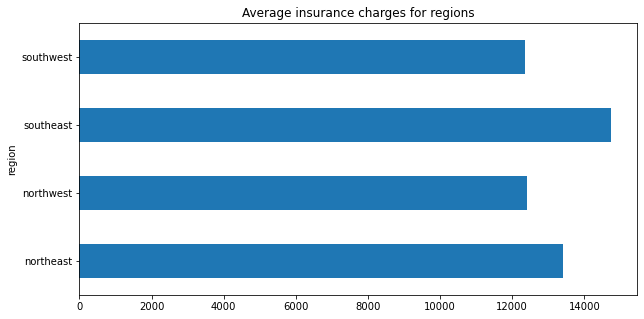

In [22]:
# get a pivot table of the average charges for each region
pv_region = insurance.pivot_table(values = 'charges', index = 'region', aggfunc= np.mean)

# plot a bar chart of the pivot table
pv_region.plot(kind= 'barh',
              title= 'Average insurance charges for regions',
              legend= None,
              figsize= (10, 5))

# show the pivot table
print(pv_region)

# show the pivot line plot
plt.show()

From the above chart we see that on the average, southeast charges the highest insurance fees, while southwest has the least insurance charges.


# Do older adults incur more insurance charges than younger adults?

In [23]:
# check the unique age counts
insurance['age'].value_counts().sort_index()

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

From the above chart, we'll group those who are 35 years and above as older adults and those below 35 as younger adults.

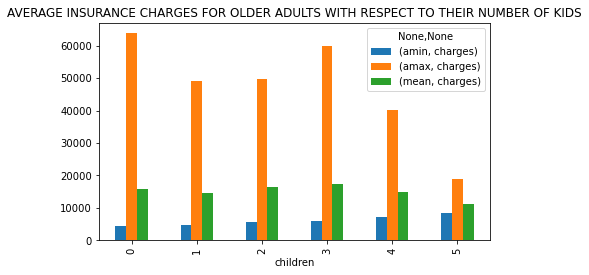

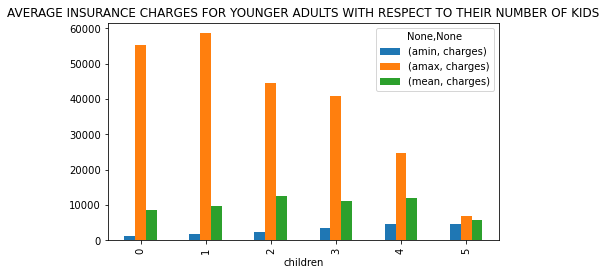

In [24]:
# dataframe of respndents above 35 years
above_35_yrs = insurance[insurance['age'] >= 35]

# dataframe of respondents below 35 years
below_35_yrs = insurance[insurance['age'] < 35]

# Lets get the minimum, maximum and average insurance charges for older adults with respect to their number of children
pv_age_above_35 = above_35_yrs.pivot_table(values = 'charges', index = 'children', aggfunc= [np.min, np.max, np.mean])

# # Lets get the minimum, maximum and average insurance charges for younger adults with respect to their number of children
pv_age_below_35 = below_35_yrs.pivot_table(values = 'charges', index = 'children', aggfunc= [np.min, np.max, np.mean])

# plot a bar chart of the pivot table for older adults
pv_age_above_35.plot(kind= 'bar',
              title= 'Average insurance charges for older adults with respect to their number of kids'.upper(),
              legend= True,
              figsize= (7, 4))

# plot a bar chart of the pivot table for younger adults
pv_age_below_35.plot(kind= 'bar',
              title= 'Average insurance charges for younger adults with respect to their number of kids'.upper(),
              legend= True,
              figsize= (7, 4))

# show the pivot line plot
plt.show()

From the above charts we can deduce the following:

- older adults have more children than younger adults
- Generally on the average, older adults incur more insurance charges than younger adults.
- Generally, Judging from the maximum charges, older adults incur more insurance charges than younger adults.


# Convert the categorical columns to Numerical values

In [25]:
model_data = pd.get_dummies(insurance, columns= ['sex', 'smoker', 'region'], drop_first = True)

# check
model_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


We'll only care if a person has a child or not and not bother about the number of children.  
Therefore we'll binarize the children column:

In [26]:
# create a new children column filled with zeros
model_data['kids'] = 0

# Replace all the kids values with a 1 where the corresponding children column is greater than 0.
model_data.loc[model_data['children'] > 0, 'kids'] = 1

# check
model_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,kids
0,19,27.900,0,16884.92400,0,1,0,0,1,0
1,18,33.770,1,1725.55230,1,0,0,1,0,1
2,28,33.000,3,4449.46200,1,0,0,1,0,1
3,33,22.705,0,21984.47061,1,0,1,0,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0


In [27]:
# lets delete the children column
model_data.drop('children', axis=1, inplace = True)

# check
model_data.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,kids
0,19,27.900,16884.92400,0,1,0,0,1,0
1,18,33.770,1725.55230,1,0,0,1,0,1
2,28,33.000,4449.46200,1,0,0,1,0,1
3,33,22.705,21984.47061,1,0,1,0,0,0
4,32,28.880,3866.85520,1,0,1,0,0,0


# Modelling

In [28]:
# next we get the dependent and independent variavles separately
y = model_data['charges']
x = model_data.drop(['charges'], axis = 1)

# check
print(x.shape)
y.shape

(1338, 8)


(1338,)

In [29]:
# Import Lasso from sklearn.linear_model.
from sklearn.linear_model import Lasso

# instantiate lasso
lasso = Lasso()

In [30]:
# first we get the hyper parameters
# import relevant modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid by using alpha_space as the grid of values to tune alpha over
alpha_space = np.logspace(-1, 1, 15)
param_grid = {"alpha": alpha_space}

# Use GridSearchCV with 5-fold cross-validation to tune C:
# Inside GridSearchCV(), specify the classifier, parameter grid, and number of folds to use.
lasso_cv = GridSearchCV(lasso, param_grid = param_grid, cv = 5)

# Use the .fit() method on the GridSearchCV object to fit it to the data x and y.
lasso_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_)) 
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Lasso Regression Parameters: {'alpha': 10.0}
Best score is 0.7460333531938418


 Lasso regression score is: 0.7689248397829056, 



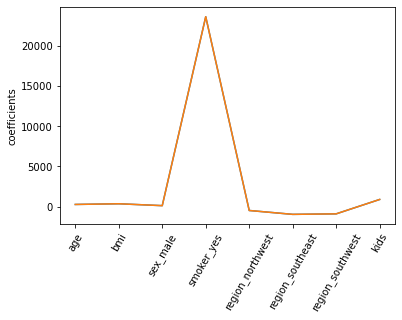

In [31]:
# split the data set into training and test set
# import package for splitting training and testing data
from sklearn.model_selection import train_test_split

# create training and test sets such that 30% is used for testing
# and 70% for training. Use a random state of 42.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# instantiate lasso again now with the tuned hyperparameter
lasso_tuned = Lasso(alpha = 0.1, normalize = True)

# fit lasso
lasso_tuned.fit(x_train, y_train)

# get lasso efficients
lasso_coef = lasso_tuned.fit(x_train, y_train).coef_

# predict on the test set
y_pred = lasso_tuned.predict(x_test)

# get the lasso score
print(f' Lasso regression score is: {lasso_tuned.score(x_test, y_test)}, \n')

# get the names of our feature variables
names = model_data.drop('charges', axis = 1).columns

# plot the lasso coefficients
plt.plot(range(len(names)), lasso_coef)

# Plot the coefficients
plt.plot(range(len(names)), lasso_coef)

# set the x-axis names
plt.xticks(range(len(names)), names, rotation= 60)

# set the y-axis label
plt.ylabel('coefficients')

plt.show()


Above we see that the lasso regressor identified smoking as the most important feature that affects insurance charges, the model also indicates that the number of kids tends to slightly affect the charges on insurance.